# **Preprocessing Data**

In [54]:
import pandas as pd

In [55]:
df = pd.read_excel('/content/IP___Riwayat_Medical_01012016 s.d 19032024 - Copy.xlsx')

df.head()

,PT IP,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Report Detail Realisasi Biaya Perawatan Keseha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Periode 01-JAN-2016 sampai dengan 19-MAR-2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,NIP,Unit Kerja,Divisi/ Bagian,Tanggal submit,Tanggal Kuitansi,Nama Pasien,Diagnosa Penyakit,Institusi,Area Kota,...,Biaya Persalinan,Tipe Alat Bantu,Keterangan Alat Bantu,Biaya Alat Bantu,Total Biaya Kuitansi (Rp),Total Biaya Penggantian (Rp),Transaction ID,Invoice Number,Status,Last Approver
3,1,5483155K3,KMJ,SUB UNIT PEMELIHARAAN MESIN UNIT KMJ,2017-03-17 00:00:00,2017-03-11 00:00:00,ETI NURHAYATI,hiperkolesterol,Rumah Sakit,Bandung,...,NaN,NaN,NaN,NaN,1172500,1172500,2111,MEDBNI18030200793,Not Transferred to Interface,NaN
4,2,5483155K3,KMJ,SUB UNIT PEMELIHARAAN MESIN UNIT KMJ,2017-03-22 00:00:00,2017-03-20 00:00:00,AAT WITARSA,Hiperlipidemia,Laboratorium,Garut,...,NaN,NaN,NaN,NaN,454000,454000,3399,MEDBNI18030200793,Not Transferred to Interface,NaN


In [56]:
# Get the first 5000 records, starting from row 3
df_subset = df.iloc[2:5003]

# Rename columns using the first row
new_header = df_subset.iloc[0]  # Grab the first row for the header
df_subset = df_subset[1:]  # Take the data less the header row
df_subset.columns = new_header  # Set the header row as the df header

df_subset.head()

2,No,NIP,Unit Kerja,Divisi/ Bagian,Tanggal submit,Tanggal Kuitansi,Nama Pasien,Diagnosa Penyakit,Institusi,Area Kota,...,Biaya Persalinan,Tipe Alat Bantu,Keterangan Alat Bantu,Biaya Alat Bantu,Total Biaya Kuitansi (Rp),Total Biaya Penggantian (Rp),Transaction ID,Invoice Number,Status,Last Approver
3,1,5483155K3,KMJ,SUB UNIT PEMELIHARAAN MESIN UNIT KMJ,2017-03-17 00:00:00,2017-03-11 00:00:00,ETI NURHAYATI,hiperkolesterol,Rumah Sakit,Bandung,...,NaN,NaN,NaN,NaN,1172500,1172500,2111,MEDBNI18030200793,Not Transferred to Interface,NaN
4,2,5483155K3,KMJ,SUB UNIT PEMELIHARAAN MESIN UNIT KMJ,2017-03-22 00:00:00,2017-03-20 00:00:00,AAT WITARSA,Hiperlipidemia,Laboratorium,Garut,...,NaN,NaN,NaN,NaN,454000,454000,3399,MEDBNI18030200793,Not Transferred to Interface,NaN
5,3,5483155K3,KMJ,SUB UNIT PEMELIHARAAN MESIN UNIT KMJ,2017-03-22 00:00:00,2017-03-20 00:00:00,AAT WITARSA,Hiperlipidemia,Poliklinik,Garut,...,NaN,NaN,NaN,NaN,59000,59000,3398,MEDBNI18030200793,Not Transferred to Interface,NaN
6,4,5483155K3,KMJ,SUB UNIT PEMELIHARAAN MESIN UNIT KMJ,2017-07-31 00:00:00,2017-07-21 00:00:00,AAT WITARSA,Vertigo,Poliklinik,Garut,...,NaN,NaN,NaN,NaN,80500,80500,30257,MEDBNI17080101276,Not Transferred to Interface,NaN
7,5,5483155K3,KMJ,SUB UNIT PEMELIHARAAN MESIN UNIT KMJ,2017-08-23 00:00:00,2017-08-18 00:00:00,AAT WITARSA,Check Up,Laboratorium,Garut,...,NaN,NaN,NaN,NaN,586000,586000,35560,MEDBNI17082301558,Not Transferred to Interface,NaN


In [57]:
# Select specific columns and rename them
df_new = df_subset[['No', 'Diagnosa Penyakit', 'Institusi', 'Area Kota', 'Rumah Sakit / Poliklinik', 'Tipe Dokter', 'Total Biaya Penggantian (Rp)']].copy()
df_new = df_new.rename(columns={
    'Diagnosa Penyakit': 'Diagnosa',
    'Area Kota': 'Area',
    'Rumah Sakit / Poliklinik': 'Rumah',
    'Tipe Dokter': 'Tipe',
    'Total Biaya Penggantian (Rp)': 'Biaya_Berobat'
})


df_new.head()

2,No,Diagnosa,Institusi,Area,Rumah,Tipe,Biaya_Berobat
3,1,hiperkolesterol,Rumah Sakit,Bandung,RS BORROMEUS,NaN,1172500
4,2,Hiperlipidemia,Laboratorium,Garut,NaN,NaN,454000
5,3,Hiperlipidemia,Poliklinik,Garut,KLINIK BHAKTI IP KOSAKA GARUT,NaN,59000
6,4,Vertigo,Poliklinik,Garut,KLINIK BHAKTI IP KOSAKA GARUT,NaN,80500
7,5,Check Up,Laboratorium,Garut,NaN,NaN,586000


In [58]:
# casefold all of the data in df_new to lowercase, except for numerical values staying as an integer and NaN unchanged.

def casefold_dataframe(df):
  for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
      continue  # Skip numeric columns
    df[column] = df[column].apply(lambda x: x.casefold() if isinstance(x, str) else x)

  return df

df_new_lower = casefold_dataframe(df_new.copy())
df_new_lower.head(10)


2,No,Diagnosa,Institusi,Area,Rumah,Tipe,Biaya_Berobat
3,1,hiperkolesterol,rumah sakit,bandung,rs borromeus,NaN,1172500.0
4,2,hiperlipidemia,laboratorium,garut,NaN,NaN,454000.0
5,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip kosaka garut,NaN,59000.0
6,4,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,NaN,80500.0
7,5,check up,laboratorium,garut,NaN,NaN,586000.0
8,6,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,NaN,137860.0
9,7,pemeriksaan,rumah sakit,bandung,rs borromeus,NaN,546900.0
10,8,syaraf,rumah sakit,bandung,rs borromeus,spesialis saraf (neurologi),1471700.0
11,9,jantung,rumah sakit,bandung,rs borromeus,spesialis penyakit dalam,2368800.0
12,10,konsul dokter,rumah sakit,bandung,rs borromeus,NaN,3217300.0


In [59]:
# Find the mode of the 'Tipe' column
mode_tipe = df_new_lower['Tipe'].mode()[0]

# Fill NaN values in 'Tipe' column with the mode
df_new_lower['Tipe'].fillna(mode_tipe, inplace=True)

df_new_lower.head(25)


<ipython-input-59-3feff710825c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new_lower['Tipe'].fillna(mode_tipe, inplace=True)


2,No,Diagnosa,Institusi,Area,Rumah,Tipe,Biaya_Berobat
3,1,hiperkolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1172500.0
4,2,hiperlipidemia,laboratorium,garut,NaN,dokter umum,454000.0
5,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,59000.0
6,4,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,80500.0
7,5,check up,laboratorium,garut,NaN,dokter umum,586000.0
8,6,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,137860.0
9,7,pemeriksaan,rumah sakit,bandung,rs borromeus,dokter umum,546900.0
10,8,syaraf,rumah sakit,bandung,rs borromeus,spesialis saraf (neurologi),1471700.0
11,9,jantung,rumah sakit,bandung,rs borromeus,spesialis penyakit dalam,2368800.0
12,10,konsul dokter,rumah sakit,bandung,rs borromeus,dokter umum,3217300.0


In [60]:
# Fill NaN values in 'Rumah' column with a combination of 'Institusi' and 'Area'
df_new_lower['Rumah'].fillna(df_new_lower['Institusi'] + ' ' + df_new_lower['Area'], inplace=True)

df_new_lower.head(25)

<ipython-input-60-a67418aacaba>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new_lower['Rumah'].fillna(df_new_lower['Institusi'] + ' ' + df_new_lower['Area'], inplace=True)


2,No,Diagnosa,Institusi,Area,Rumah,Tipe,Biaya_Berobat
3,1,hiperkolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1172500.0
4,2,hiperlipidemia,laboratorium,garut,laboratorium garut,dokter umum,454000.0
5,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,59000.0
6,4,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,80500.0
7,5,check up,laboratorium,garut,laboratorium garut,dokter umum,586000.0
8,6,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,137860.0
9,7,pemeriksaan,rumah sakit,bandung,rs borromeus,dokter umum,546900.0
10,8,syaraf,rumah sakit,bandung,rs borromeus,spesialis saraf (neurologi),1471700.0
11,9,jantung,rumah sakit,bandung,rs borromeus,spesialis penyakit dalam,2368800.0
12,10,konsul dokter,rumah sakit,bandung,rs borromeus,dokter umum,3217300.0


In [61]:
# Convert 'Biaya_Berobat' column to numeric, handling errors by coercing to NaN
df_new_lower['Biaya_Berobat'] = pd.to_numeric(df_new_lower['Biaya_Berobat'], errors='coerce')

# Fill NaN values in 'Biaya_Berobat' with the median of the column
median_biaya = df_new_lower['Biaya_Berobat'].median()
df_new_lower['Biaya_Berobat'].fillna(median_biaya, inplace=True)

# Convert 'Biaya_Berobat' to integer, rounding values
df_new_lower['Biaya_Berobat'] = df_new_lower['Biaya_Berobat'].round(0).astype(int)

df_new_lower.head(455) # default 25, go to the first NaN value in the dataset


<ipython-input-61-28d9c9f4a645>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new_lower['Biaya_Berobat'].fillna(median_biaya, inplace=True)


2,No,Diagnosa,Institusi,Area,Rumah,Tipe,Biaya_Berobat
3,1,hiperkolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1172500
4,2,hiperlipidemia,laboratorium,garut,laboratorium garut,dokter umum,454000
5,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,59000
6,4,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,80500
7,5,check up,laboratorium,garut,laboratorium garut,dokter umum,586000
...,...,...,...,...,...,...,...
453,451,obsgyn,rumah sakit,bandung,rs borromeus,spesialis obsgyn,188300
454,452,sakit dalam,dokter langganan,bandung,dokter langganan bandung,spesialis anak,224500
455,453,bayi kuning,rumah sakit,bandung,rs borromeus,spesialis anak,261448
456,454,vaksin,rumah sakit,bandung,rs borromeus,spesialis anak,368800


In [108]:
# Discretize 'biaya_berobat' column on df_new_lower for each multiple of 250.000 (eg 0 - 250.000, 250.001 - 500.000), place the resulting dataframe to a new variable

def discretize_biaya_berobat(df):
  df_copy = df.copy()
  bins = list(range(0, int(df_copy['Biaya_Berobat'].max()) + 250001, 250000))
  labels = []

  for i in range(len(bins) - 1):
    binLow = bins[i]

    if i != 0:
      binLow += 1

    labels.append(f"{binLow} - {bins[i+1]}")

  df_copy['Biaya_Berobat_Diskretisasi'] = pd.cut(df_copy['Biaya_Berobat'], bins=bins, labels=labels, include_lowest=True)
  return df_copy


df_discretized = discretize_biaya_berobat(df_new_lower)
df_discretized.head(455) # default 25, go to the first NaN value in the dataset



2,No,Diagnosa,Institusi,Area,Rumah,Tipe,Biaya_Berobat,Biaya_Berobat_Diskretisasi
3,1,hiperkolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1172500,1000001 - 1250000
4,2,hiperlipidemia,laboratorium,garut,laboratorium garut,dokter umum,454000,250001 - 500000
5,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,59000,0 - 250000
6,4,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,80500,0 - 250000
7,5,check up,laboratorium,garut,laboratorium garut,dokter umum,586000,500001 - 750000
...,...,...,...,...,...,...,...,...
453,451,obsgyn,rumah sakit,bandung,rs borromeus,spesialis obsgyn,188300,0 - 250000
454,452,sakit dalam,dokter langganan,bandung,dokter langganan bandung,spesialis anak,224500,0 - 250000
455,453,bayi kuning,rumah sakit,bandung,rs borromeus,spesialis anak,261448,250001 - 500000
456,454,vaksin,rumah sakit,bandung,rs borromeus,spesialis anak,368800,250001 - 500000


In [109]:
# for a final check, count NaN data on each column in df_discretized
nan_counts = df_discretized.isnull().sum()

print(nan_counts)

2
No                            0
Diagnosa                      0
Institusi                     0
Area                          0
Rumah                         0
Tipe                          0
Biaya_Berobat                 0
Biaya_Berobat_Diskretisasi    0
dtype: int64


In [110]:
# Remove 'Biaya_Berobat' column
df_discretized = df_discretized.drop('Biaya_Berobat', axis=1)

# Rename 'Biaya_Berobat_Diskretisasi' to 'Biaya_Berobat'
df_discretized = df_discretized.rename(columns={'Biaya_Berobat_Diskretisasi': 'Biaya_Berobat'})

# Display the updated DataFrame
df_discretized.head()

2,No,Diagnosa,Institusi,Area,Rumah,Tipe,Biaya_Berobat
3,1,hiperkolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1000001 - 1250000
4,2,hiperlipidemia,laboratorium,garut,laboratorium garut,dokter umum,250001 - 500000
5,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,0 - 250000
6,4,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,0 - 250000
7,5,check up,laboratorium,garut,laboratorium garut,dokter umum,500001 - 750000


In [111]:
# save the changes to a new file
outputFilePath = '/content/IP___Riwayat_Medical_01012016 s.d 19032024 - New.xlsx'
df_discretized.to_excel(outputFilePath, index=False)

# **EDA**

In [74]:
import pandas as pd

In [112]:
df = pd.read_excel('/content/IP___Riwayat_Medical_01012016 s.d 19032024 - New.xlsx')

df.head(10)

,No,Diagnosa,Institusi,Area,Rumah,Tipe,Biaya_Berobat
0,1,hiperkolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1000001 - 1250000
1,2,hiperlipidemia,laboratorium,garut,laboratorium garut,dokter umum,250001 - 500000
2,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,0 - 250000
3,4,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,0 - 250000
4,5,check up,laboratorium,garut,laboratorium garut,dokter umum,500001 - 750000
5,6,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,0 - 250000
6,7,pemeriksaan,rumah sakit,bandung,rs borromeus,dokter umum,500001 - 750000
7,8,syaraf,rumah sakit,bandung,rs borromeus,spesialis saraf (neurologi),1250001 - 1500000
8,9,jantung,rumah sakit,bandung,rs borromeus,spesialis penyakit dalam,2250001 - 2500000
9,10,konsul dokter,rumah sakit,bandung,rs borromeus,dokter umum,3000001 - 3250000


In [113]:
df.tail(10)

,No,Diagnosa,Institusi,Area,Rumah,Tipe,Biaya_Berobat
4990,4991,konsul hasil mcu- hiperkolesterol periode baya...,poliklinik,bandung,klinik bhakti ip,dokter umum,0 - 250000
4991,4992,dbd,poliklinik,bandung,non langganan 100%,dokter umum,1000001 - 1250000
4992,4993,dbd,poliklinik,bandung,non langganan 100%,dokter umum,3750001 - 4000000
4993,4994,dbd,poliklinik,bandung,non langganan 100%,dokter umum,250001 - 500000
4994,4995,ranap 15-18jan2022,rumah sakit,bandung,rs santo barromeus,dokter umum,5000001 - 5250000
4995,4996,ranap 15-18jan2022,rumah sakit,bandung,rs santo barromeus,dokter umum,4750001 - 5000000
4996,4997,demam,laboratorium,bandung,laboratorium bandung,dokter umum,0 - 250000
4997,4998,cek lab- typus,laboratorium,bandung,laboratorium bandung,dokter umum,250001 - 500000
4998,4999,cek darah setelah dbd,laboratorium,bandung,laboratorium bandung,dokter umum,0 - 250000
4999,5000,hipertensi - 019/kes/peg/adk/kmj/2022,poliklinik,bandung,kbip,dokter umum,0 - 250000


In [114]:
df.dtypes

,0
No,int64
Diagnosa,object
Institusi,object
Area,object
Rumah,object
Tipe,object
Biaya_Berobat,object


## **Univariate Analysis**
Menganalisis masing-masing fitur secara individu.

In [82]:
import matplotlib.pyplot as plt

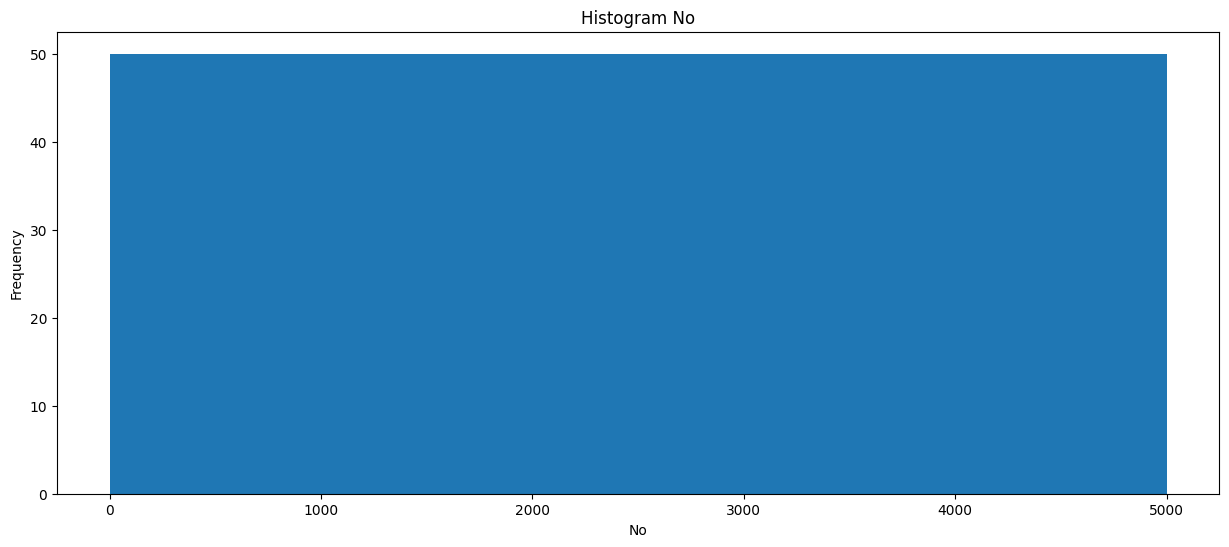

In [122]:
col = "No"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=100)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

**Analisa:**
* Histogram nomor menunjukkan distribusi yang rata, yang berarti semua nomor tertera pada dataset dengan jumlah yang sama.


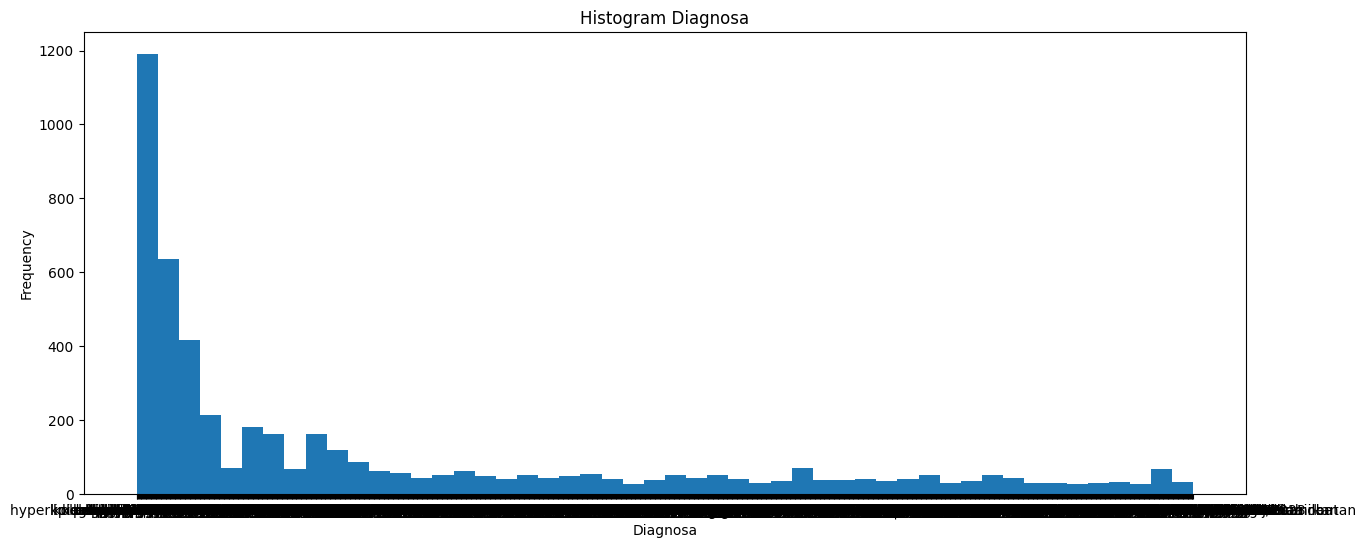

In [134]:
col = "Diagnosa"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=50)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

**Analisa:**
* Histogram diagnosa menunjukkan salah satu tipe diagnosa yang memiliki frekuensi lebih dari 1000, dengan banyak tipe diagnosa tidak mencapai frekuensi 200.

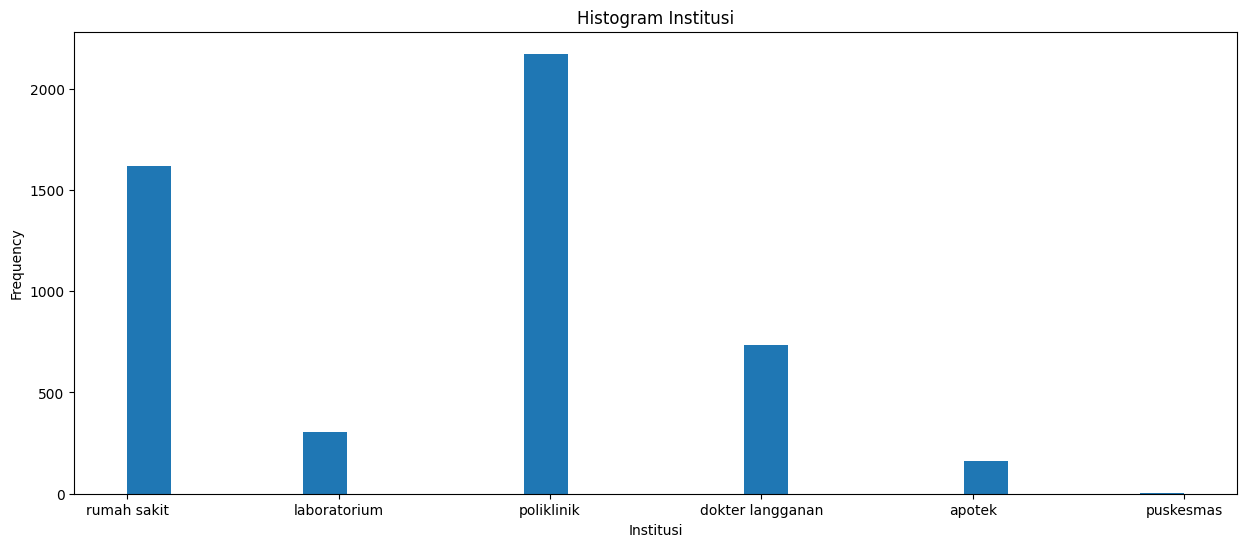

In [102]:
col = "Institusi"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=24)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

**Analisa:**
* Histogram institusi menunjukkan banyaknya orang yang berobat ke poliklinik, dengan frekuensi yang melebihi 2000, dengan rumah sakit sebagai institusi kedua yang paling sering dikunjung dengan frekuensi lebih dari 1500.

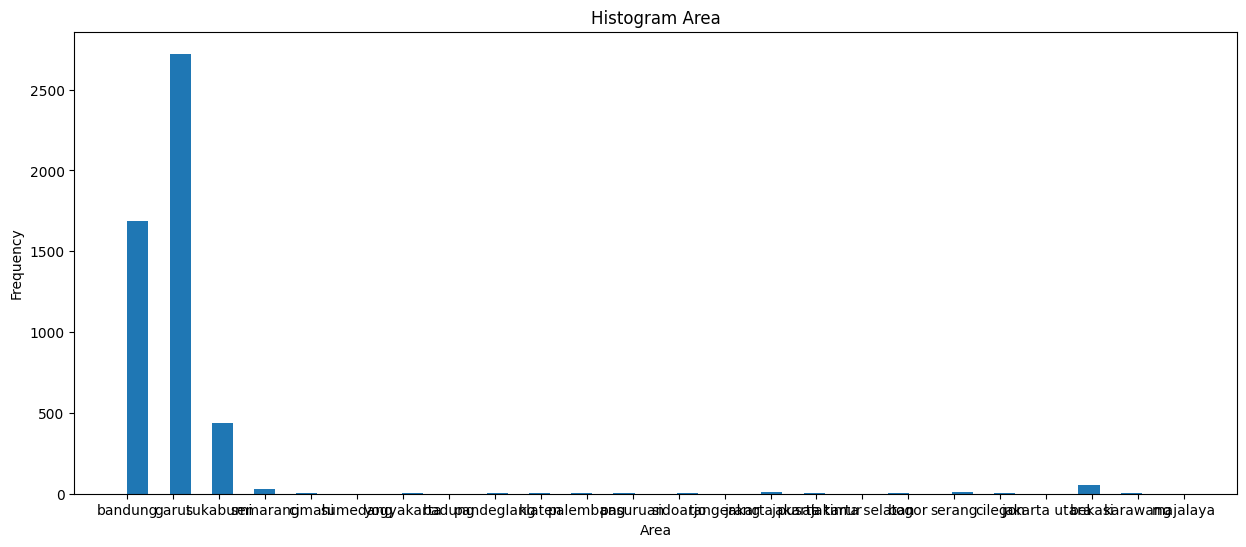

In [95]:
col = "Area"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=50)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

**Analisa:**
* Histogram area menunjukkan orang-orang yang berobat pada data yang tersedia cenderung berasal dari Bandung atau Garut, dengan keduanya memiliki frekuensi lebih dari 1500.

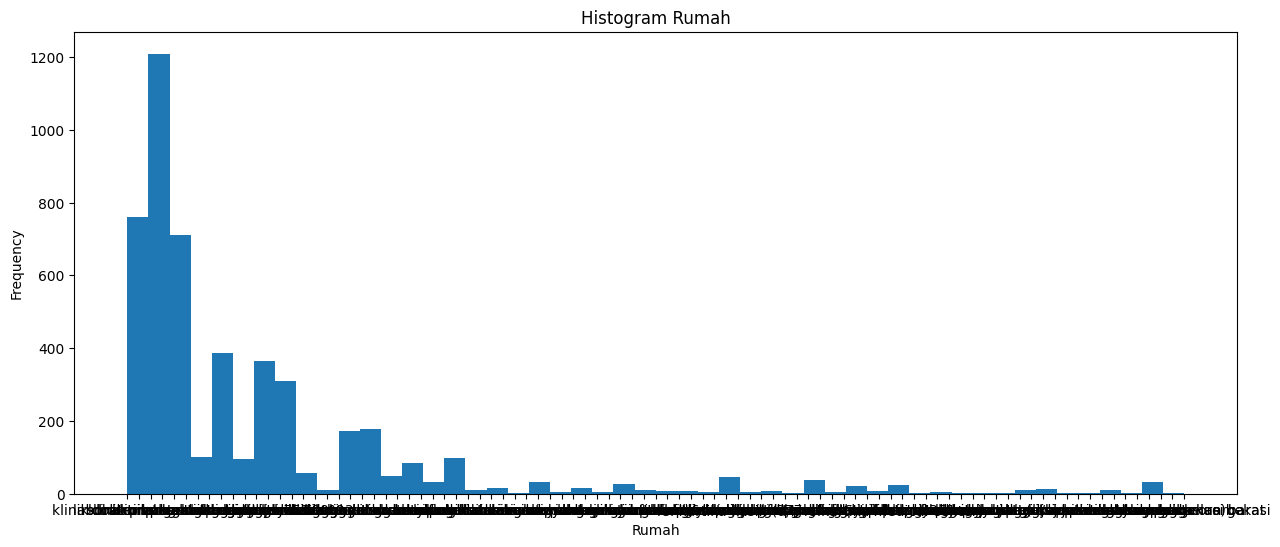

In [129]:
col = "Rumah"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=50)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

**Analisa:**
* Histogram rumah menunjukkan rumah sakit/poliklinik yang sering dikunjungi oleh para pasien adalah Klinik Bhakti Ip Kosaka Garut, dengan frekuensi lebih dari 1000.
* Beberapa rumah sakit/poliklinik lainnya mampu mencapai frekuensi lebih dari 400, dengan dua rumah sakit/poliklinik mencapai frekuensi lebih dari 600.
* Data ini telah dipengaruhi oleh pengisian data kosong.

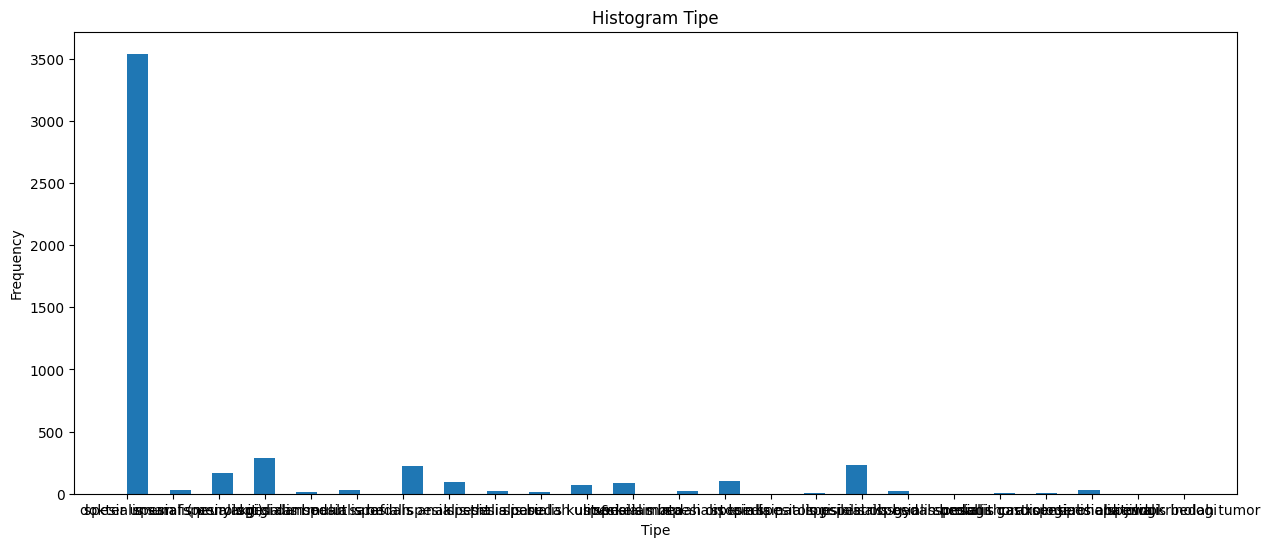

In [103]:
col = "Tipe"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=50)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

**Analisa:**
* Histogram tipe menunjukkan dokter umum sebagai tipe dokter yang paling sering dikunjung, dengan frekuensi melebihi 3000.
* Data ini telah dipengaruhi oleh pengisian data kosong.

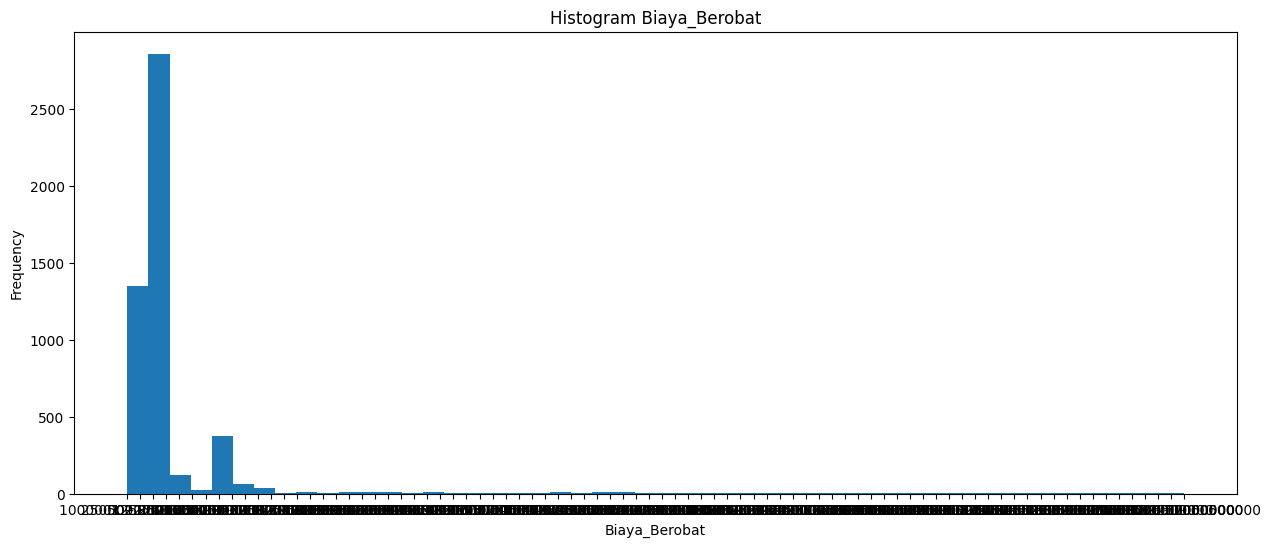

In [138]:
col = "Biaya_Berobat"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=50)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

**Analisa:**
* Histogram biaya berobat menunjukkan pasien cenderung membayar sekitar 0 - 250.000 dengan frekuensi melebihi 2500.

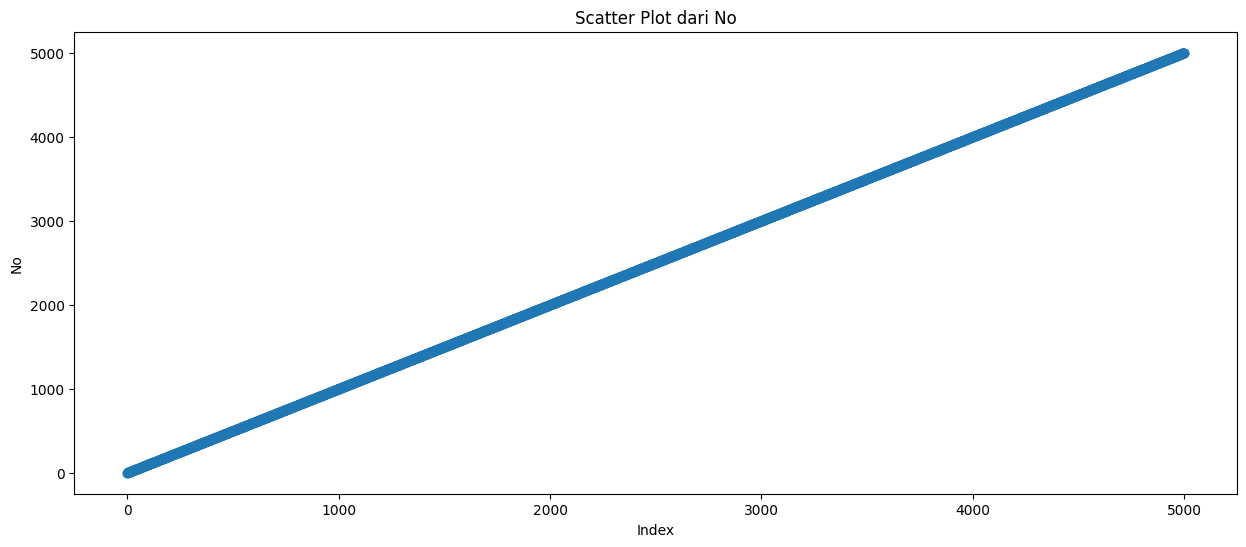

In [139]:
col = "No"

plt.figure(figsize=(15, 6))
plt.scatter(df.index, df[col])
plt.title(f"Scatter Plot dari {col}")
plt.xlabel("Index")
plt.ylabel(col)
plt.show()

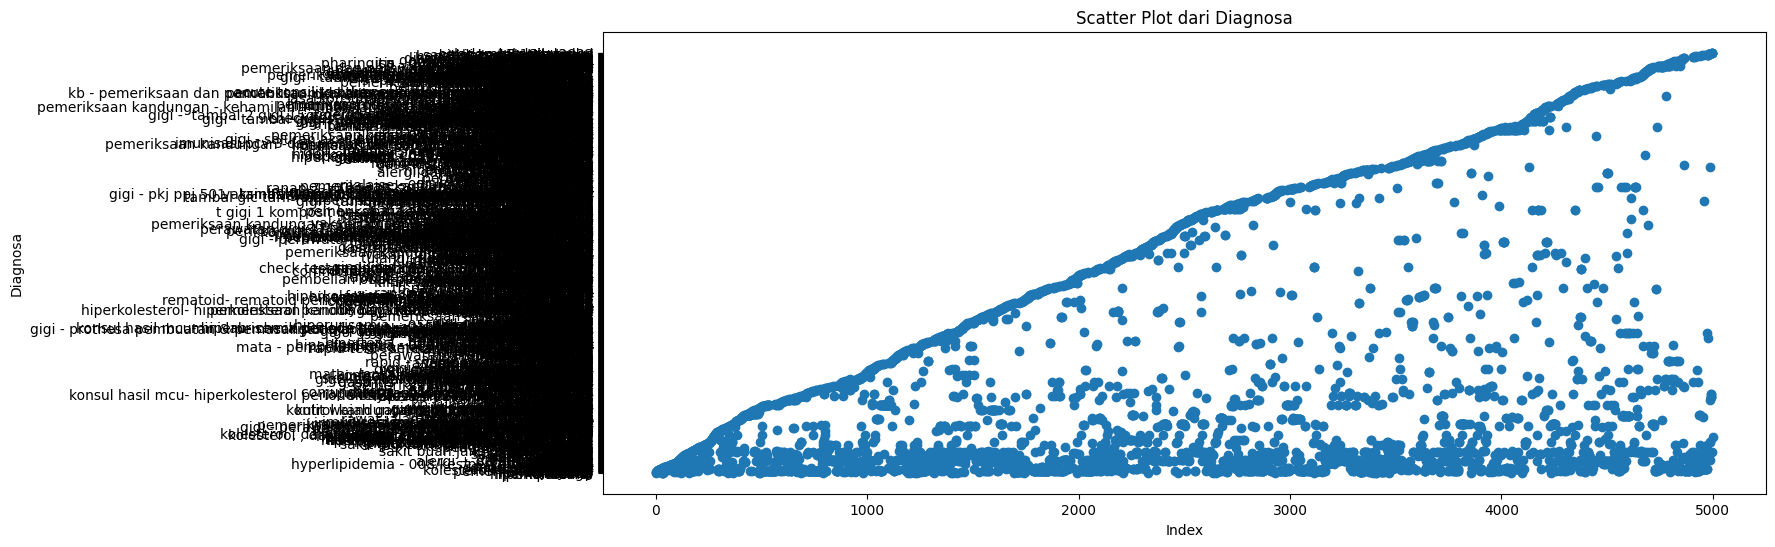

In [140]:
col = "Diagnosa"

plt.figure(figsize=(15, 6))
plt.scatter(df.index, df[col])
plt.title(f"Scatter Plot dari {col}")
plt.xlabel("Index")
plt.ylabel(col)
plt.show()

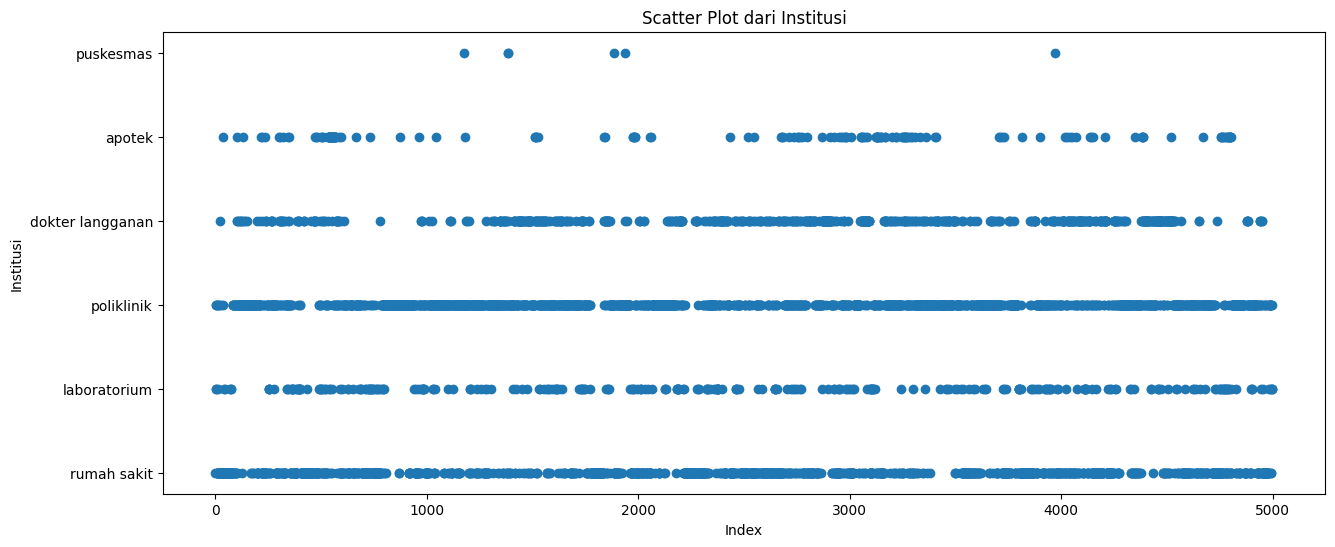

In [141]:
col = "Institusi"

plt.figure(figsize=(15, 6))
plt.scatter(df.index, df[col])
plt.title(f"Scatter Plot dari {col}")
plt.xlabel("Index")
plt.ylabel(col)
plt.show()

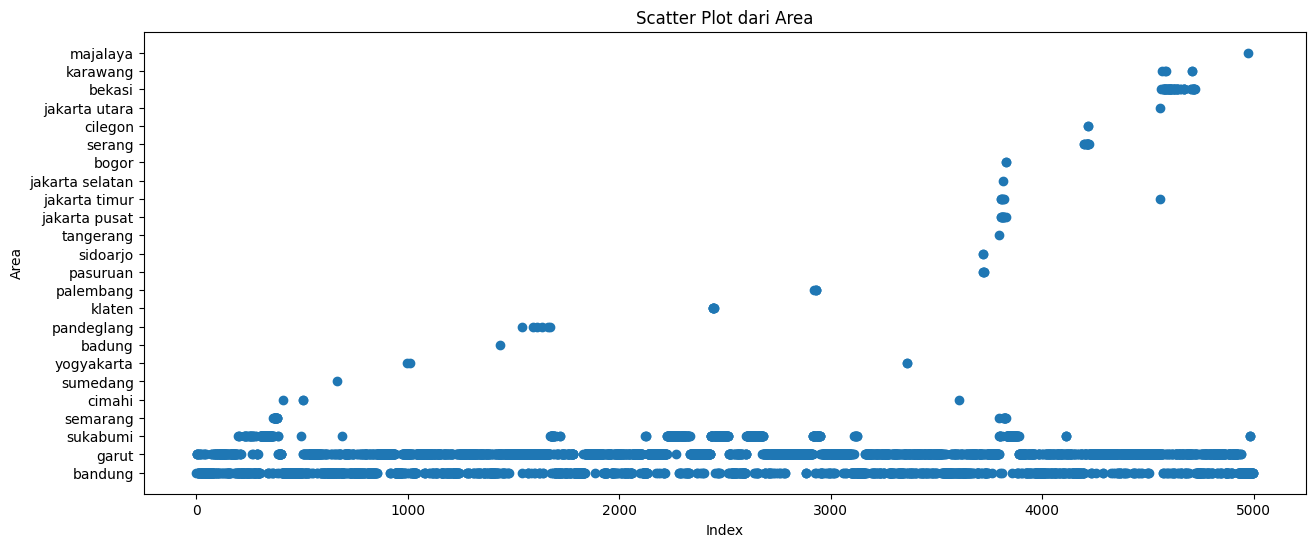

In [142]:
col = "Area"

plt.figure(figsize=(15, 6))
plt.scatter(df.index, df[col])
plt.title(f"Scatter Plot dari {col}")
plt.xlabel("Index")
plt.ylabel(col)
plt.show()

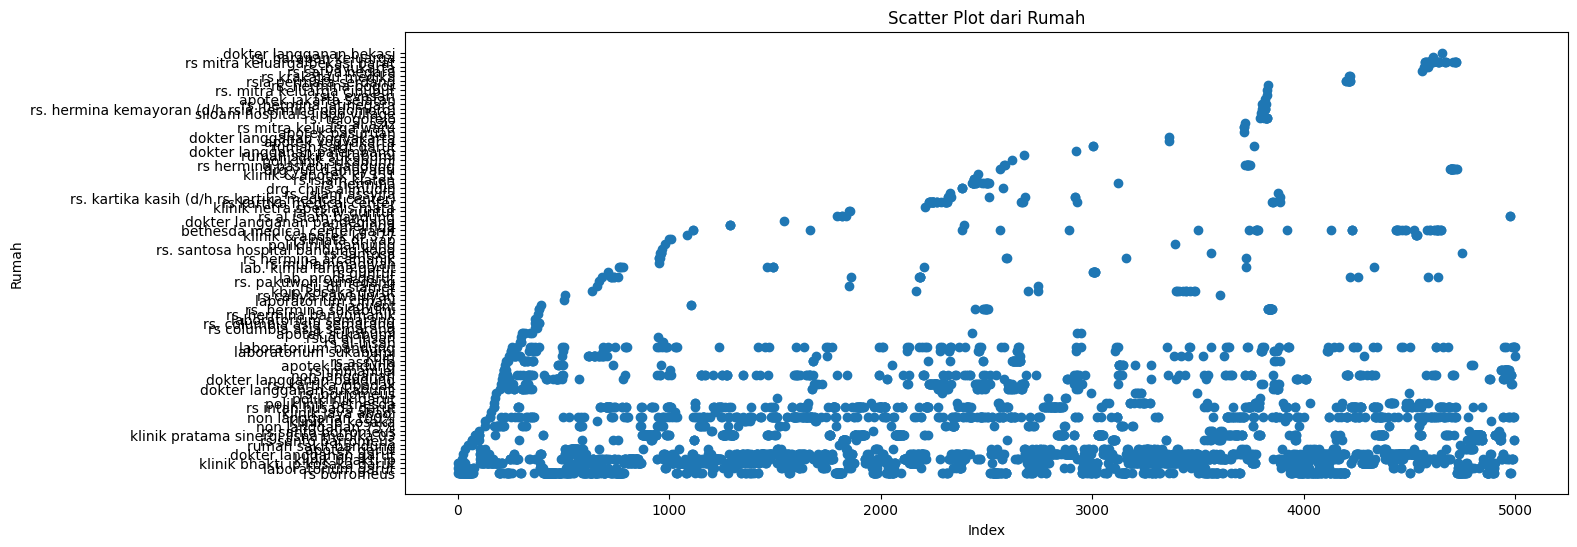

In [143]:
col = "Rumah"

plt.figure(figsize=(15, 6))
plt.scatter(df.index, df[col])
plt.title(f"Scatter Plot dari {col}")
plt.xlabel("Index")
plt.ylabel(col)
plt.show()

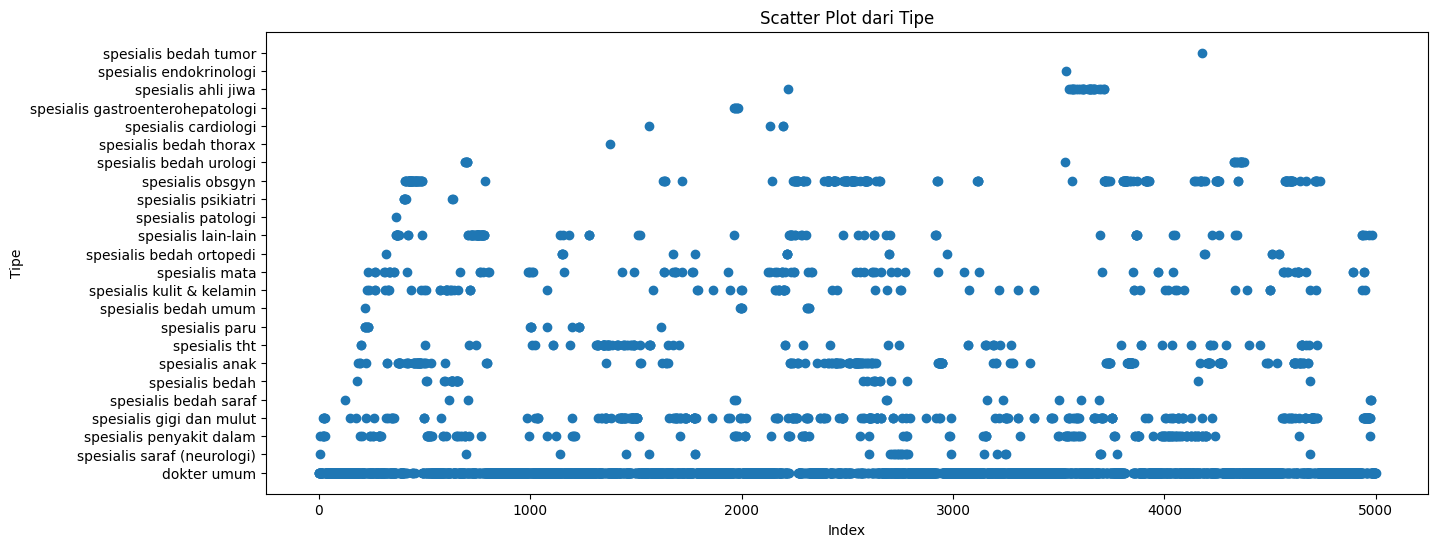

In [144]:
col = "Tipe"

plt.figure(figsize=(15, 6))
plt.scatter(df.index, df[col])
plt.title(f"Scatter Plot dari {col}")
plt.xlabel("Index")
plt.ylabel(col)
plt.show()

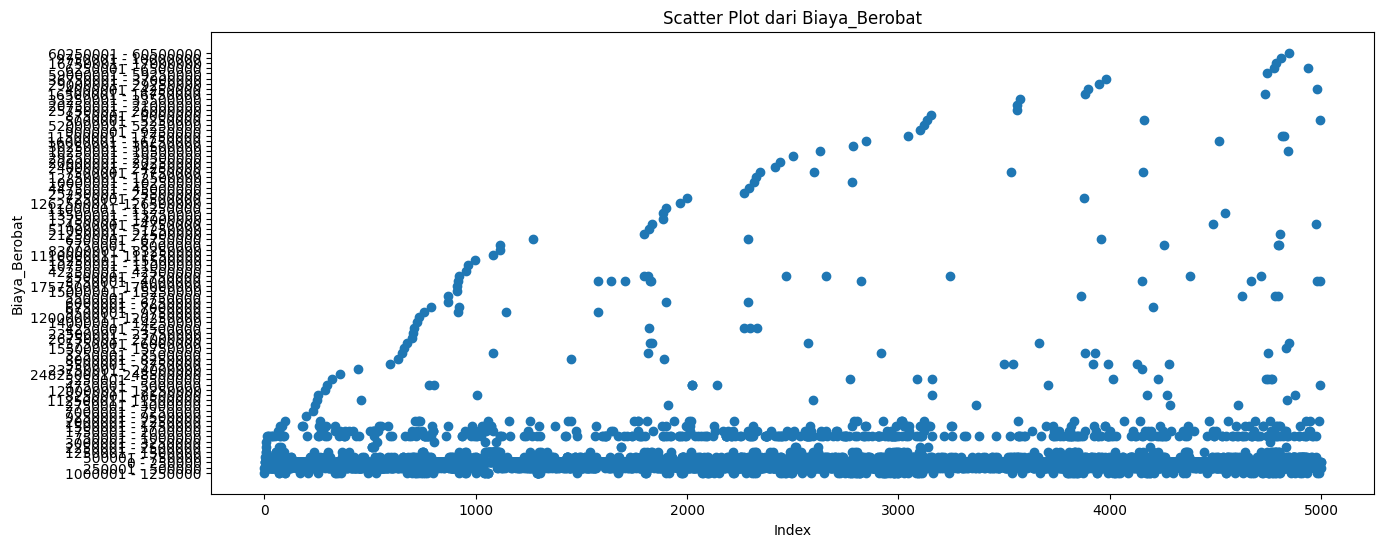

In [145]:
col = "Biaya_Berobat"

plt.figure(figsize=(15, 6))
plt.scatter(df.index, df[col])
plt.title(f"Scatter Plot dari {col}")
plt.xlabel("Index")
plt.ylabel(col)
plt.show()

In [146]:
from sklearn.preprocessing import LabelEncoder

toEncode = df.copy()

encoder = LabelEncoder()
toEncode['diagnosa_enc'] = encoder.fit_transform(toEncode['Diagnosa'])
toEncode['institusi_enc'] = encoder.fit_transform(toEncode['Institusi'])
toEncode['area_enc'] = encoder.fit_transform(toEncode['Area'])
toEncode['rumah_enc'] = encoder.fit_transform(toEncode['Rumah'])
toEncode['tipe_enc'] = encoder.fit_transform(toEncode['Tipe'])
toEncode['biaya_berobat_enc'] = encoder.fit_transform(toEncode['Biaya_Berobat'])


toEncode.head()

,No,Diagnosa,Institusi,Area,Rumah,Tipe,Biaya_Berobat,diagnosa_enc,institusi_enc,area_enc,rumah_enc,tipe_enc,biaya_berobat_enc
0,1,hiperkolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1000001 - 1250000,404,5,1,44,0,2
1,2,hiperlipidemia,laboratorium,garut,laboratorium garut,dokter umum,250001 - 500000,409,2,6,30,0,36
2,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,0 - 250000,409,3,6,21,0,0
3,4,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,0 - 250000,1270,3,6,21,0,0
4,5,check up,laboratorium,garut,laboratorium garut,dokter umum,500001 - 750000,119,2,6,30,0,57


In [147]:
toEncode = toEncode.drop(['No', 'Diagnosa', 'Institusi', 'Area', 'Rumah', 'Tipe', 'Biaya_Berobat'], axis=1)

toEncode.head()

,diagnosa_enc,institusi_enc,area_enc,rumah_enc,tipe_enc,biaya_berobat_enc
0,404,5,1,44,0,2
1,409,2,6,30,0,36
2,409,3,6,21,0,0
3,1270,3,6,21,0,0
4,119,2,6,30,0,57


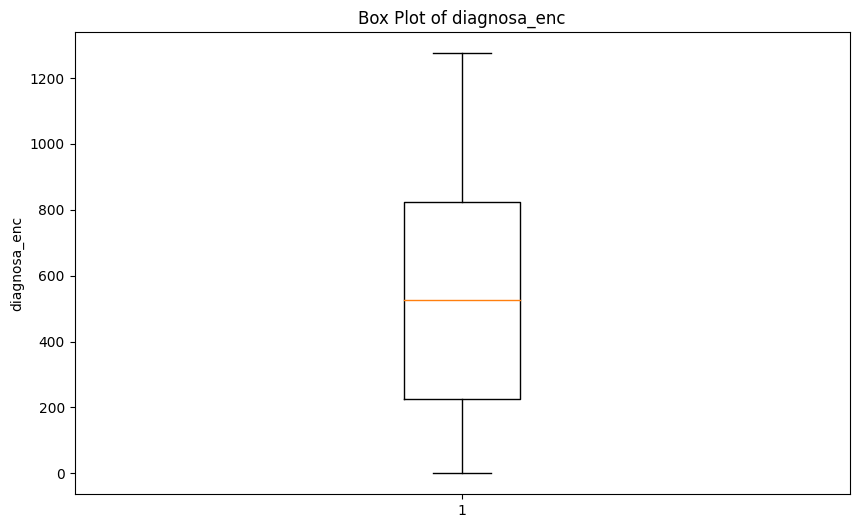

In [148]:
col = "diagnosa_enc"

plt.figure(figsize=(10, 6))
plt.boxplot(toEncode[col])
plt.title(f"Box Plot of {col}")
plt.ylabel(col)
plt.show()

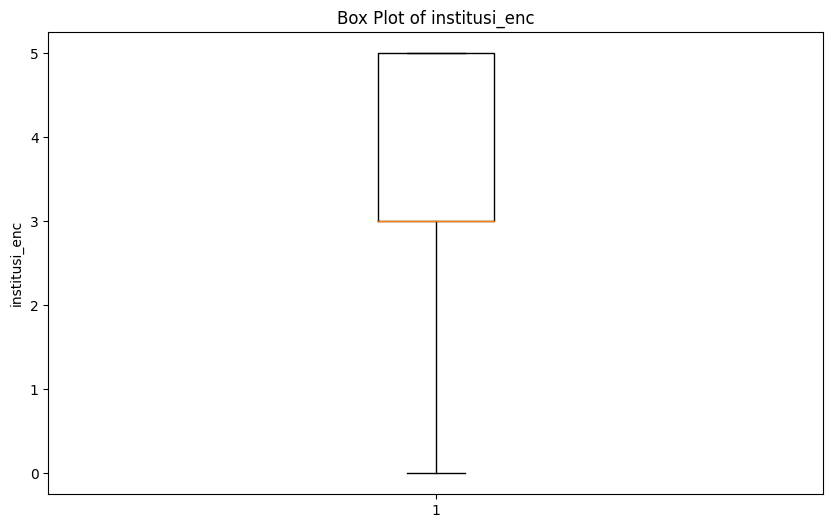

In [149]:
col = "institusi_enc"

plt.figure(figsize=(10, 6))
plt.boxplot(toEncode[col])
plt.title(f"Box Plot of {col}")
plt.ylabel(col)
plt.show()

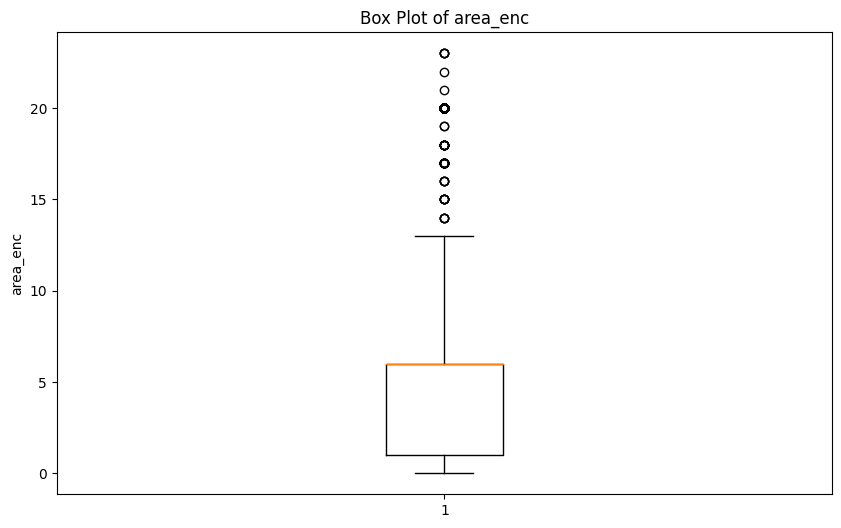

In [150]:
col = "area_enc"

plt.figure(figsize=(10, 6))
plt.boxplot(toEncode[col])
plt.title(f"Box Plot of {col}")
plt.ylabel(col)
plt.show()

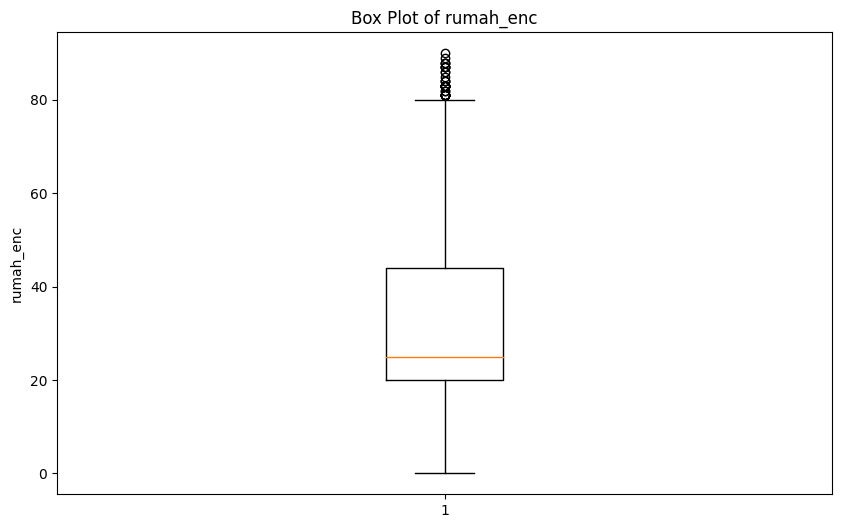

In [151]:
col = "rumah_enc"

plt.figure(figsize=(10, 6))
plt.boxplot(toEncode[col])
plt.title(f"Box Plot of {col}")
plt.ylabel(col)
plt.show()

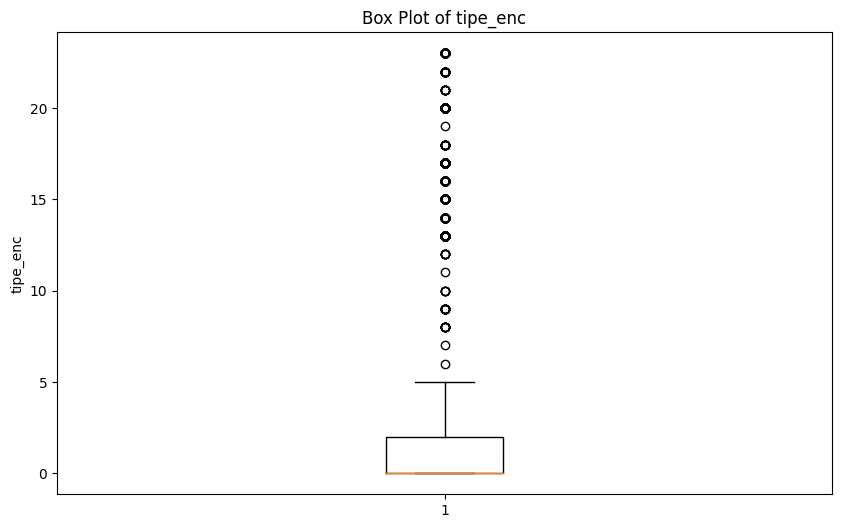

In [152]:
col = "tipe_enc"

plt.figure(figsize=(10, 6))
plt.boxplot(toEncode[col])
plt.title(f"Box Plot of {col}")
plt.ylabel(col)
plt.show()

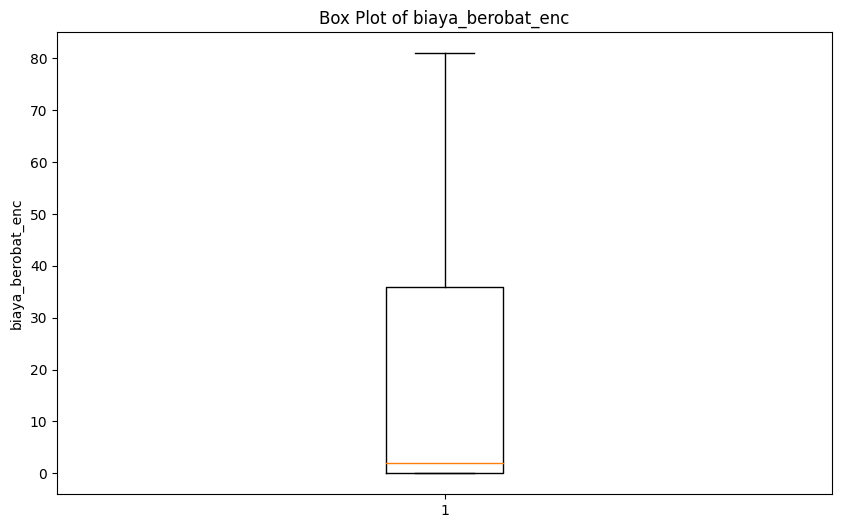

In [153]:
col = "biaya_berobat_enc"

plt.figure(figsize=(10, 6))
plt.boxplot(toEncode[col])
plt.title(f"Box Plot of {col}")
plt.ylabel(col)
plt.show()

In [154]:
# find outliers in each box plot
import numpy as np

def find_outliers_iqr(data):
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]
  return outliers

for col in toEncode.columns:
  outliers = find_outliers_iqr(toEncode[col])
  if outliers:
    print(f"Kolom '{col}' memiliki outlier:")
    print(outliers)
    print()

Kolom 'area_enc' memiliki outlier:
[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 17, 17, 17, 20, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 20, 20, 20, 21, 20, 23, 23, 15, 15, 15, 15, 15, 15, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 

## **Multivariate Analysis**
Menganalisis keseluruhan fitur secara bersama-sama.

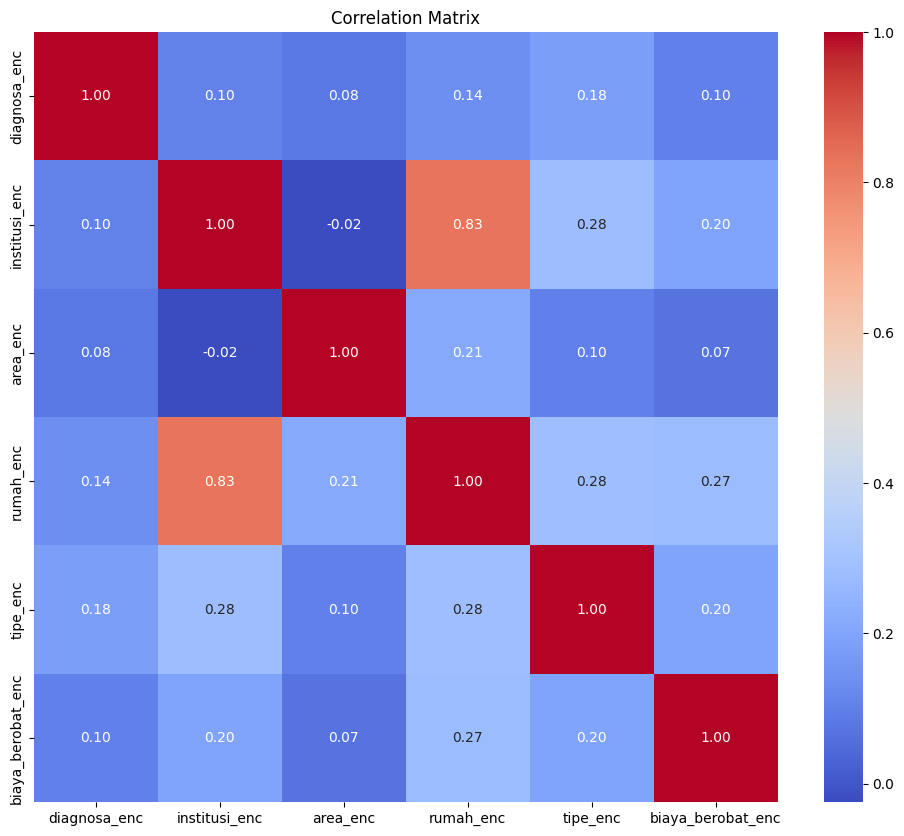

In [157]:
import seaborn as sns

# Correlation Matrix
correlationMatrix = toEncode.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

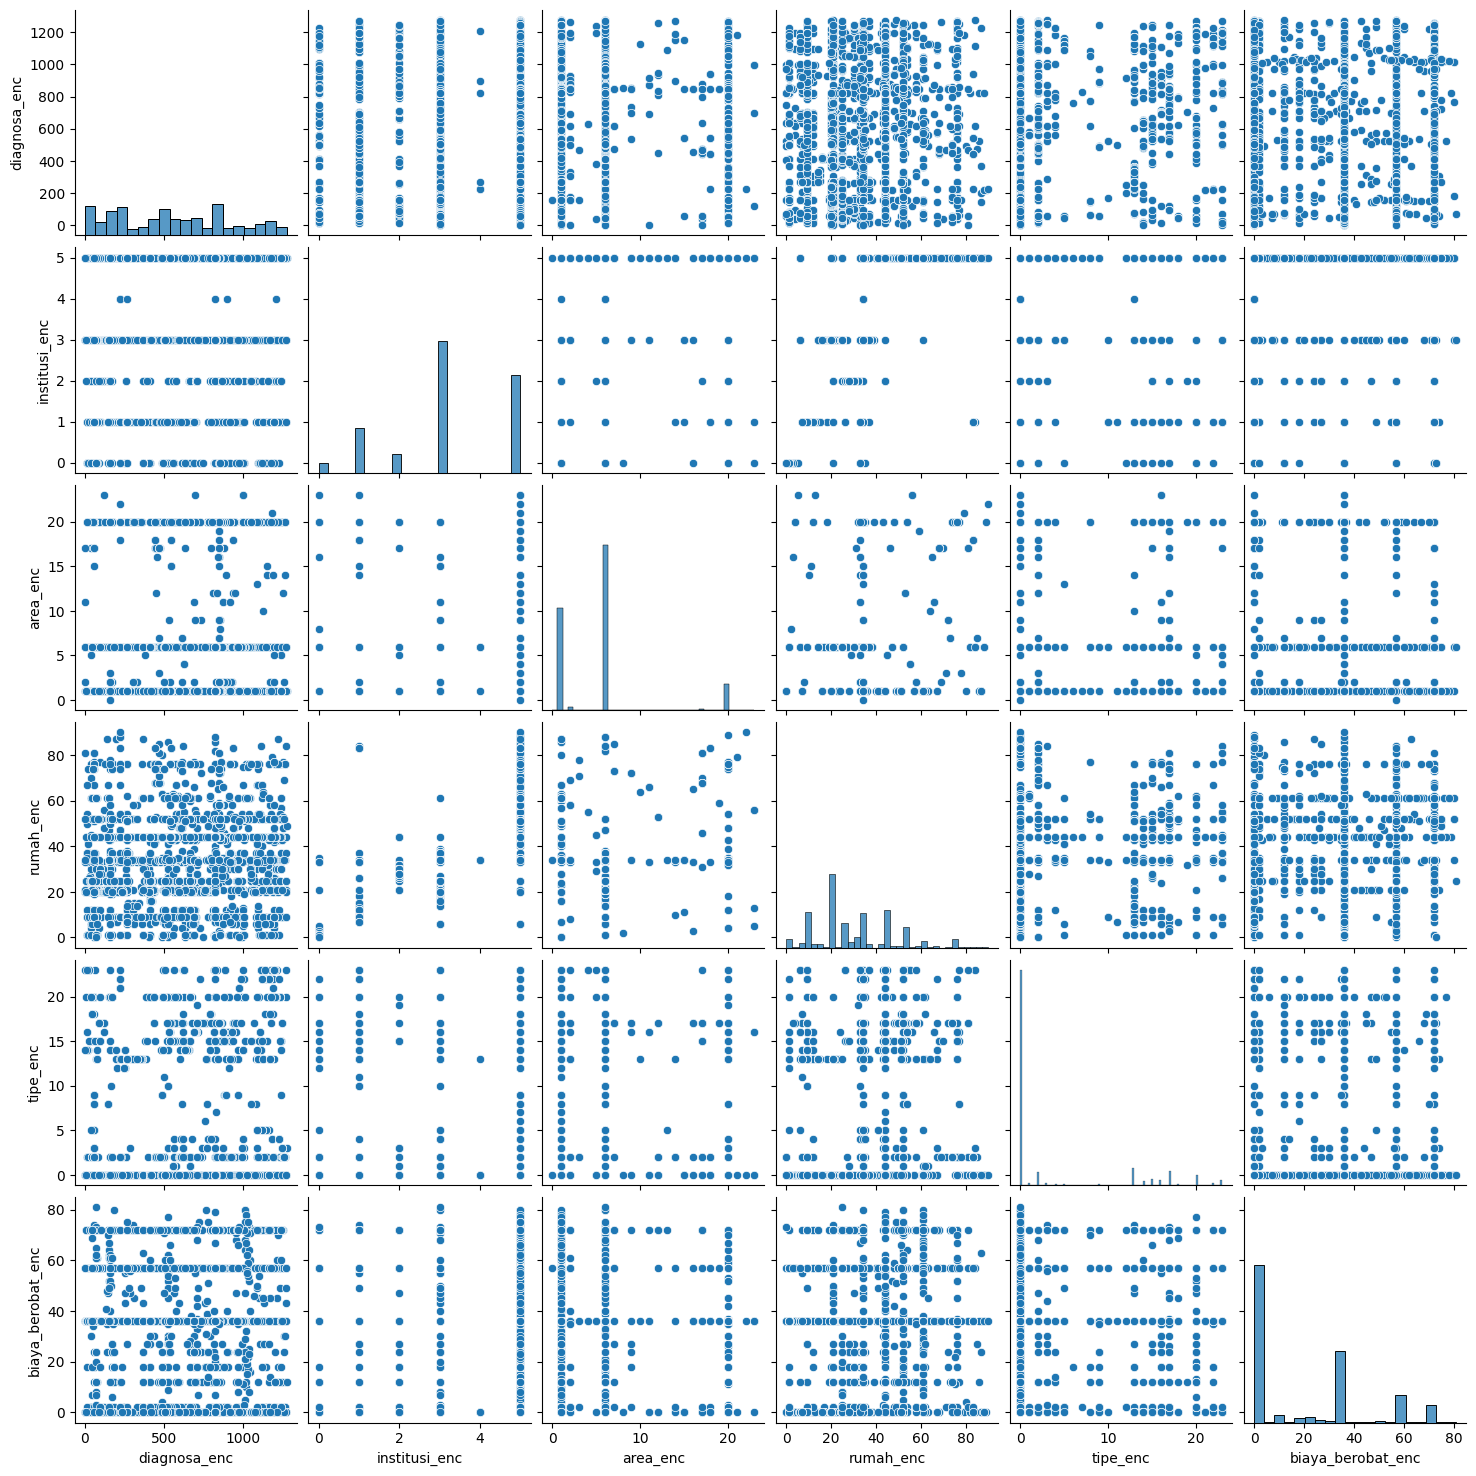

In [158]:
# perform 5 more multivariate analysis with toEncode using diagrams other than correlation matrix

# Pairplot
sns.pairplot(toEncode)
plt.show()

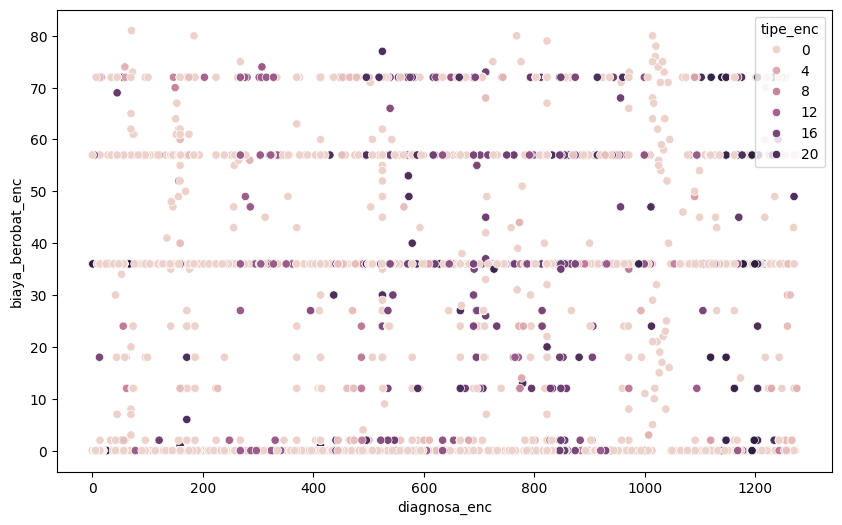

In [160]:
# Scatter Plot with two features and color-coded by another feature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='diagnosa_enc', y='biaya_berobat_enc', hue='tipe_enc', data=toEncode)
plt.show()

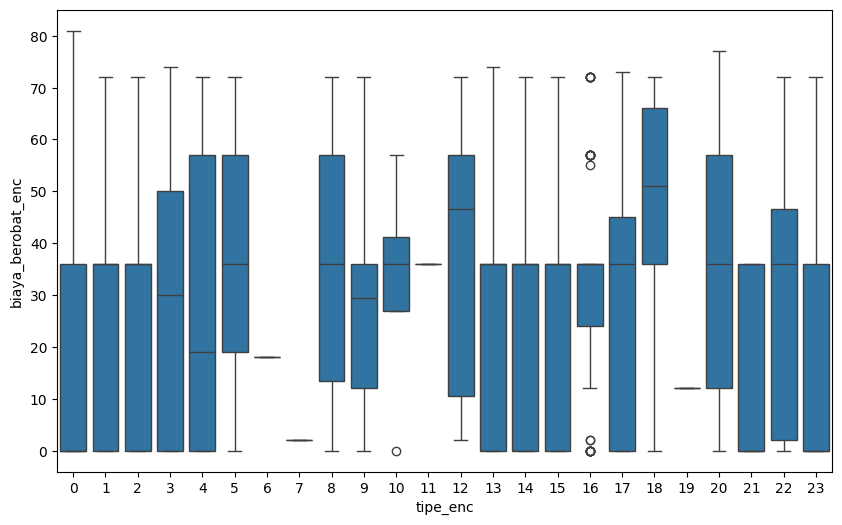

In [161]:
# Boxplot with one feature grouped by another feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='tipe_enc', y='biaya_berobat_enc', data=toEncode)
plt.show()

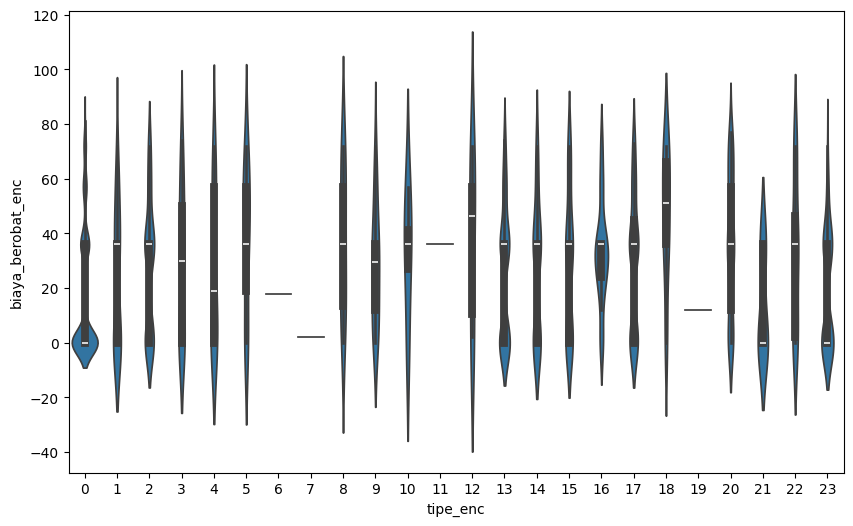

In [164]:
# Violinplot with one feature grouped by another feature
plt.figure(figsize=(10, 6))
sns.violinplot(x='tipe_enc', y='biaya_berobat_enc', data=toEncode)
plt.show()